# Exploratory Data Analysis of the HYG Star Dataset

This notebook provides a detailed exploration of the HYG star dataset. Each step includes code and visualizations to uncover insights from the data.

## 1. Data Overview

This step helps identify the structure of the dataset, including key features, missing values, and initial statistics.

We begin by exploring the dataset structure, identifying any missing values, and summarizing its key characteristics. This step ensures the data is clean and ready for analysis.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
file_path = 'hygdata_v41.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Dataset structure and summary statistics
data.info()
print(data.describe(include='all'))

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)


   id  hip        hd  hr   gl   bf proper        ra        dec      dist  ...   
0   0  NaN       NaN NaN  NaN  NaN    Sol  0.000000   0.000000    0.0000  ...  \
1   1  1.0  224700.0 NaN  NaN  NaN    NaN  0.000060   1.089009  219.7802  ...   
2   2  2.0  224690.0 NaN  NaN  NaN    NaN  0.000283 -19.498840   47.9616  ...   
3   3  3.0  224699.0 NaN  NaN  NaN    NaN  0.000335  38.859279  442.4779  ...   
4   4  4.0  224707.0 NaN  NaN  NaN    NaN  0.000569 -51.893546  134.2282  ...   

   bayer  flam  con  comp  comp_primary base         lum  var  var_min   
0    NaN   NaN  NaN     1             0  NaN    1.000000  NaN      NaN  \
1    NaN   NaN  Psc     1             1  NaN    9.638290  NaN      NaN   
2    NaN   NaN  Cet     1             2  NaN    0.392283  NaN      NaN   
3    NaN   NaN  And     1             3  NaN  386.901132  NaN      NaN   
4    NaN   NaN  Phe     1             4  NaN    9.366989  NaN      NaN   

   var_max  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4  

In [2]:
# Basic information about the dataset
data.info()

# Check for missing values
data.isnull().sum()

# Summary statistics
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119626 entries, 0 to 119625
Data columns (total 37 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            119626 non-null  int64  
 1   hip           117951 non-null  float64
 2   hd            98885 non-null   float64
 3   hr            9041 non-null    float64
 4   gl            3801 non-null    object 
 5   bf            3099 non-null    object 
 6   proper        465 non-null     object 
 7   ra            119626 non-null  float64
 8   dec           119626 non-null  float64
 9   dist          119626 non-null  float64
 10  pmra          119626 non-null  float64
 11  pmdec         119626 non-null  float64
 12  rv            119626 non-null  float64
 13  mag           119626 non-null  float64
 14  absmag        119626 non-null  float64
 15  spect         116578 non-null  object 
 16  ci            117735 non-null  float64
 17  x             119626 non-null  float64
 18  y   

,id,hip,hd,hr,ra,dec,dist,pmra,pmdec,rv,...,rarad,decrad,pmrarad,pmdecrad,flam,comp,comp_primary,lum,var_min,var_max
count,119626.000000,117951.000000,98885.000000,9041.000000,119626.000000,119626.000000,119626.000000,119626.000000,119626.000000,119626.000000,...,119626.000000,119626.000000,1.196260e+05,1.196260e+05,2737.000000,119626.000000,119626.000000,1.196260e+05,16991.000000,16991.000000
mean,59813.164805,59169.527109,114357.226253,4563.897578,12.094713,-1.986047,8772.285030,-1.306801,-19.329857,-0.276455,...,3.166388,-0.034663,-6.400491e-09,-9.363022e-08,37.318597,1.004815,59641.955679,3.565260e+05,9.501549,9.258892
std,34533.826601,34171.706401,74176.412852,2632.048273,6.887466,40.964667,27890.666828,118.175058,112.502380,13.904226,...,1.803134,0.714968,5.729060e-07,5.466507e-07,27.744027,0.073896,34441.658163,3.341375e+06,1.781276,1.742416
min,0.000000,1.000000,1.000000,1.000000,0.000000,-89.782428,0.000000,-4432.650000,-5813.000000,-386.900000,...,0.000000,-1.566999,-2.149009e-05,-2.818222e-05,1.000000,1.000000,0.000000,1.225745e-06,-1.333000,-1.523000
25%,29906.250000,29564.500000,46723.000000,2283.000000,6.217265,-36.422363,115.074800,-15.460000,-22.397500,0.000000,...,1.627676,-0.635690,-7.495220e-08,-1.085861e-07,15.000000,1.000000,29815.250000,4.746790e+00,8.525500,8.243000
50%,59813.500000,59172.000000,110358.000000,4566.000000,12.127026,-1.640078,213.675200,-1.680000,-5.760000,0.000000,...,3.174848,-0.028625,-8.144870e-09,-2.792527e-08,32.000000,1.000000,59634.500000,2.197860e+01,9.849000,9.646000
75%,89719.750000,88762.500000,175823.000000,6848.000000,18.115429,31.514932,392.156900,12.180000,3.770000,0.000000,...,4.742608,0.550039,5.905031e-08,1.827748e-08,55.000000,1.000000,89462.750000,7.670082e+01,10.707000,10.492000
max,119630.000000,120404.000000,358431.000000,9110.000000,23.998594,89.569427,100000.000000,6767.260000,9999.990000,471.000000,...,6.282817,1.563281,3.280860e-05,5.006637e-05,140.000000,3.000000,119630.000000,4.092607e+08,14.902000,13.702000


## 2. Univariate Analysis

Univariate analysis examines individual variables, such as distances and spectral types, to understand their distributions and properties.

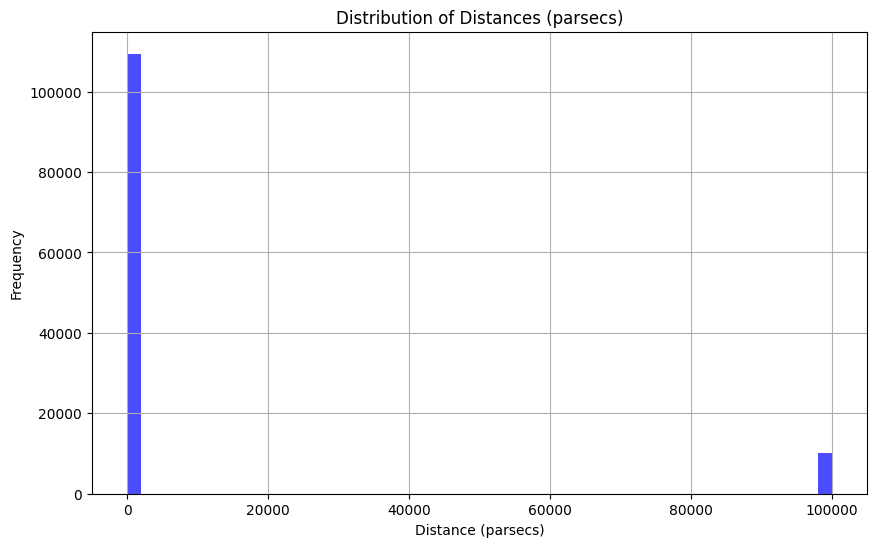

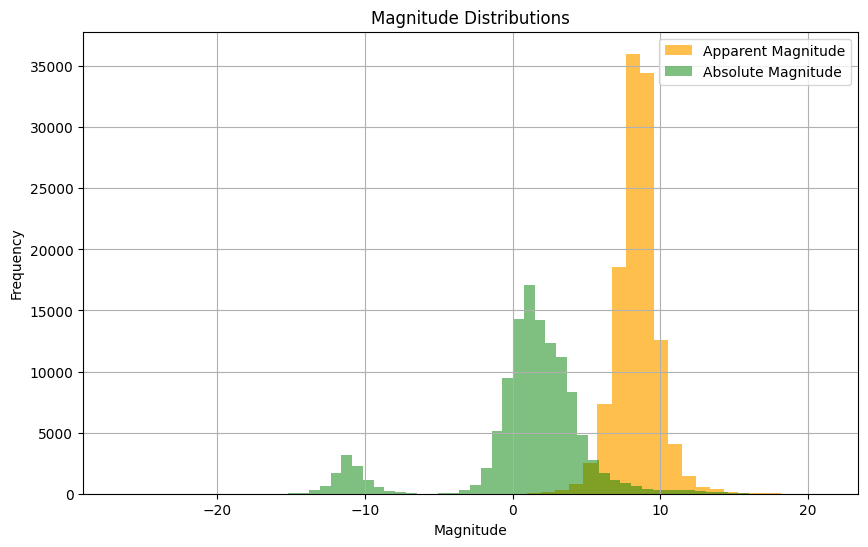

In [3]:
# Distribution of distances
plt.figure(figsize=(10, 6))
plt.hist(data['dist'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Distances (parsecs)')
plt.xlabel('Distance (parsecs)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Apparent and Absolute Magnitudes
plt.figure(figsize=(10, 6))
plt.hist(data['mag'], bins=50, color='orange', alpha=0.7, label='Apparent Magnitude')
plt.hist(data['absmag'], bins=50, color='green', alpha=0.5, label='Absolute Magnitude')
plt.title('Magnitude Distributions')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

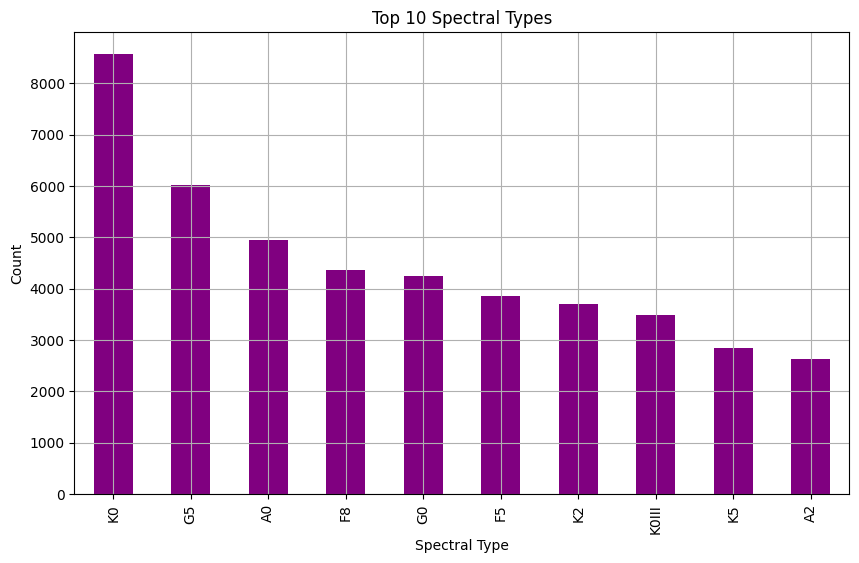

In [4]:
# Distribution of spectral types
plt.figure(figsize=(10, 6))
data['spect'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Spectral Types')
plt.xlabel('Spectral Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## 3. Bivariate Analysis

Bivariate analysis explores relationships between two variables, providing insights into star characteristics and patterns.

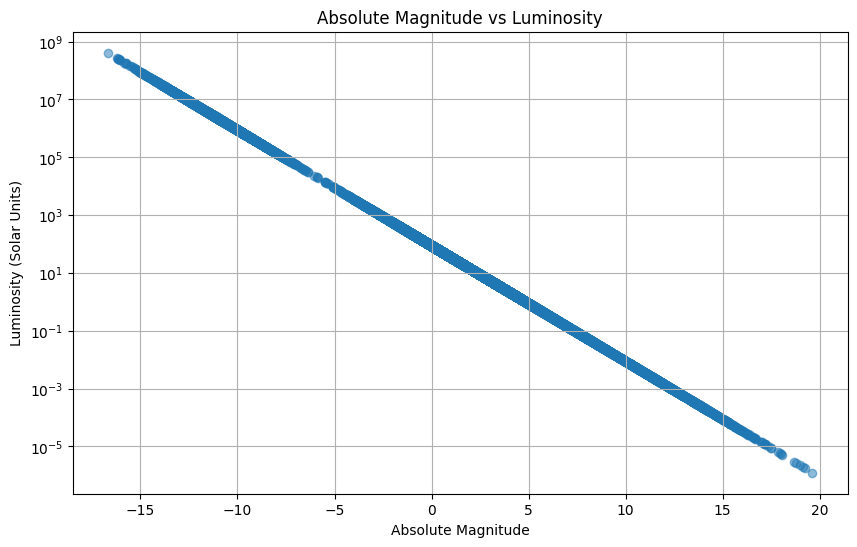

In [5]:
# Scatter plot of absolute magnitude vs luminosity
plt.figure(figsize=(10, 6))
plt.scatter(data['absmag'], data['lum'], alpha=0.5)
plt.title('Absolute Magnitude vs Luminosity')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Luminosity (Solar Units)')
plt.yscale('log')
plt.grid(True)
plt.show()

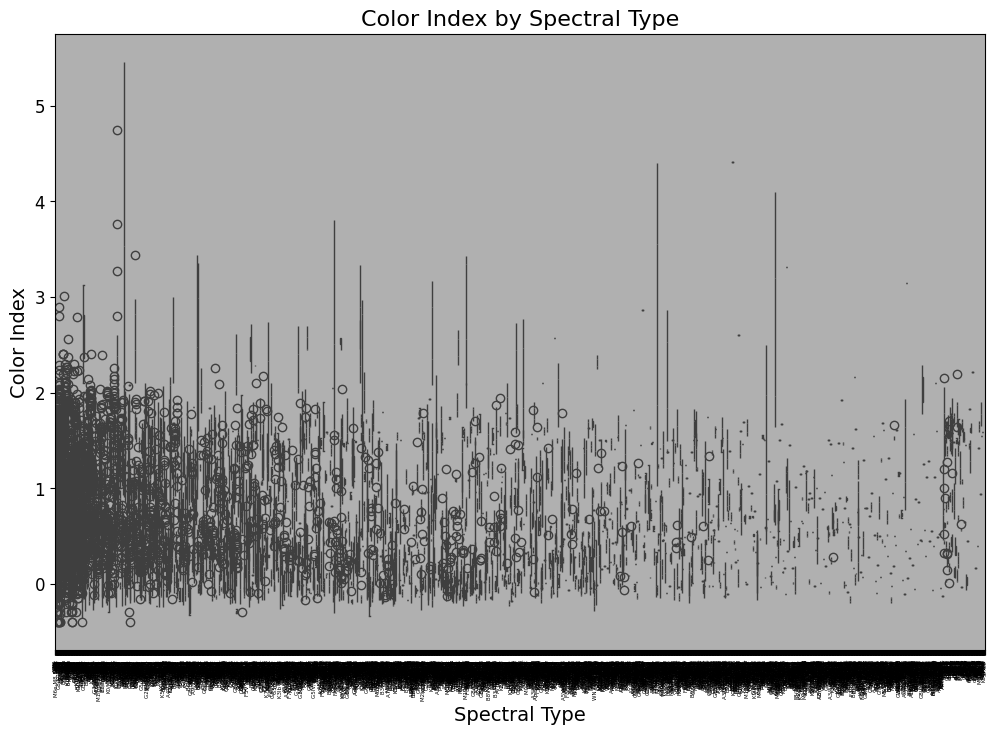

In [6]:
# Color Index and Spectral Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='spect', y='ci', data=data)
plt.title('Color Index by Spectral Type', fontsize=16)
plt.xlabel('Spectral Type', fontsize=14)
plt.ylabel('Color Index', fontsize=14)
plt.xticks(rotation=90, fontsize=4)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

## 4. Spatial Analysis

Spatial analysis visualizes the positions of stars in a 3D coordinate system, revealing their distribution in space.

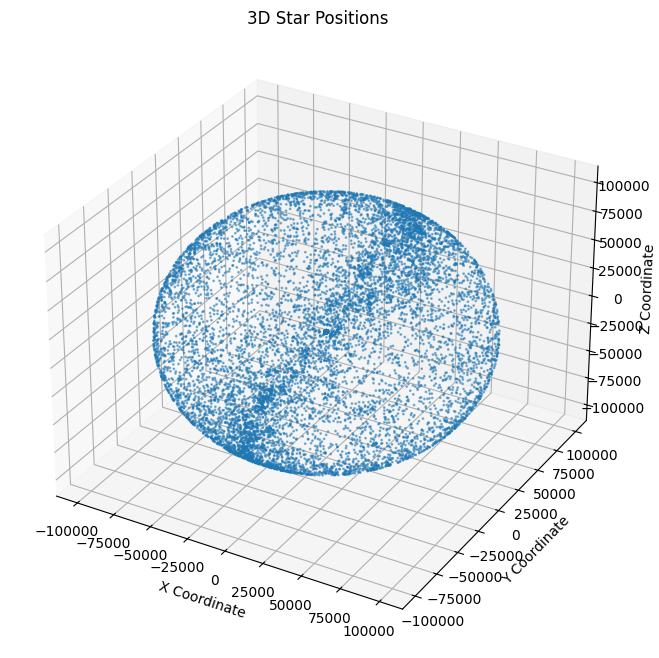

In [7]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['x'], data['y'], data['z'], s=1, alpha=0.5)
ax.set_title('3D Star Positions')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')
plt.show()

## 5. Motion Analysis

Motion analysis highlights the movement of stars, helping to understand their dynamics and velocities.

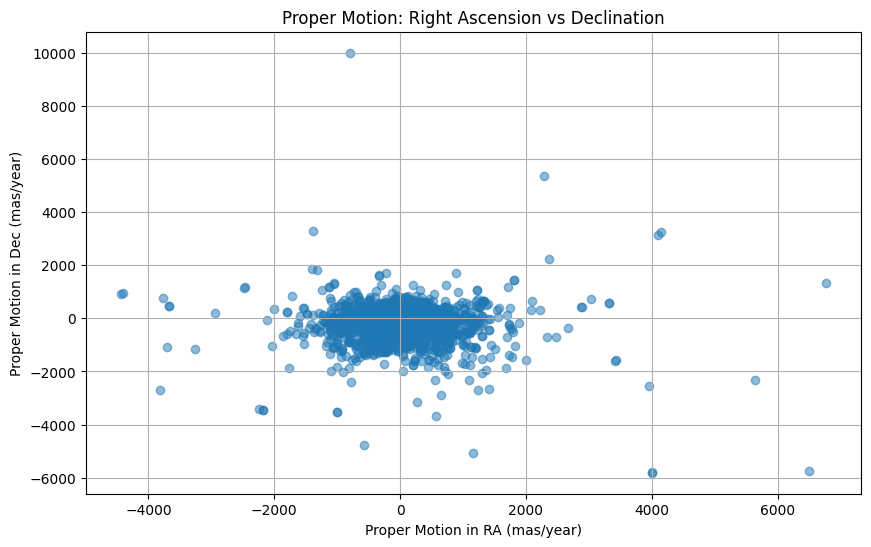

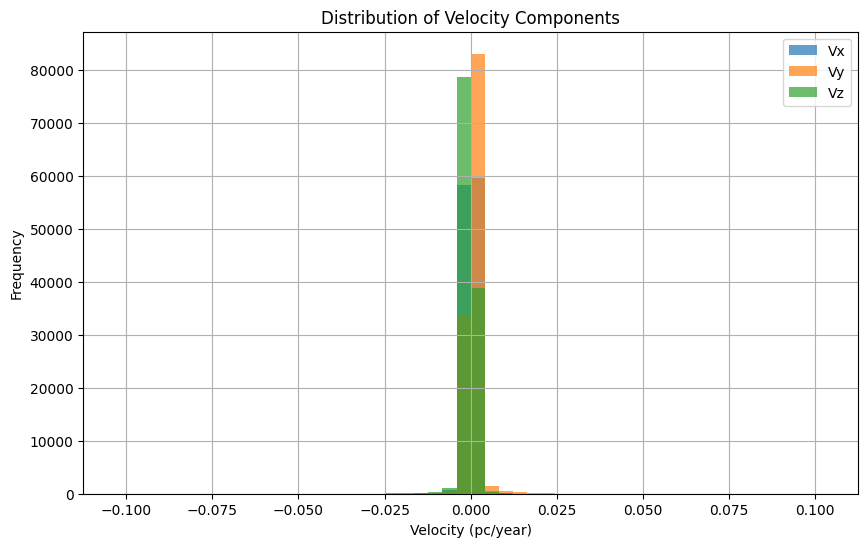

In [8]:
# Proper motion in right ascension and declination
plt.figure(figsize=(10, 6))
plt.scatter(data['pmra'], data['pmdec'], alpha=0.5)
plt.title('Proper Motion: Right Ascension vs Declination')
plt.xlabel('Proper Motion in RA (mas/year)')
plt.ylabel('Proper Motion in Dec (mas/year)')
plt.grid(True)
plt.show()

# Velocity components
plt.figure(figsize=(10, 6))
plt.hist(data['vx'], bins=50, alpha=0.7, label='Vx')
plt.hist(data['vy'], bins=50, alpha=0.7, label='Vy')
plt.hist(data['vz'], bins=50, alpha=0.7, label='Vz')
plt.title('Distribution of Velocity Components')
plt.xlabel('Velocity (pc/year)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

## 6. Catalog Insights

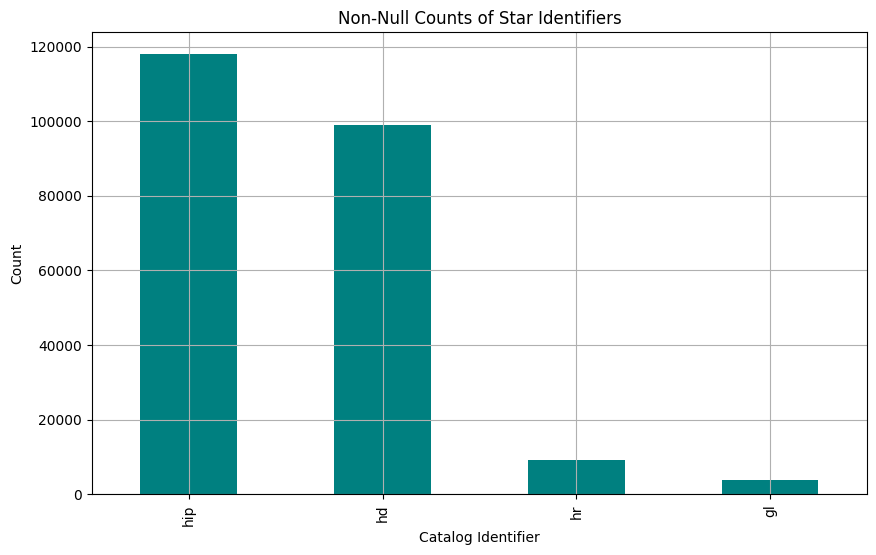

In [9]:
# Count non-null values in key identifier columns
columns_of_interest = ['hip', 'hd', 'hr', 'gl']
plt.figure(figsize=(10, 6))
data[columns_of_interest].notnull().sum().plot(kind='bar', color='teal')
plt.title('Non-Null Counts of Star Identifiers')
plt.xlabel('Catalog Identifier')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## 7. Variable Stars

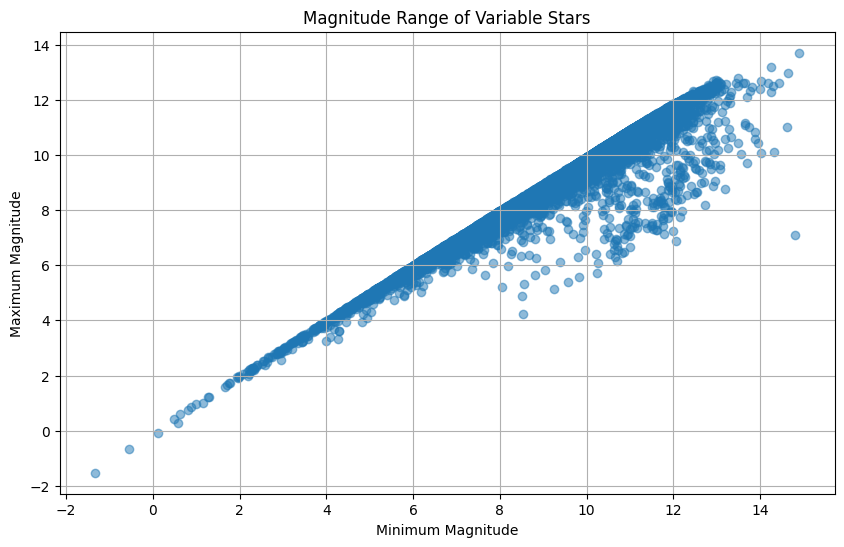

In [10]:
# Analyze variable stars
variable_stars = data.dropna(subset=['var_min', 'var_max'])
plt.figure(figsize=(10, 6))
plt.scatter(variable_stars['var_min'], variable_stars['var_max'], alpha=0.5)
plt.title('Magnitude Range of Variable Stars')
plt.xlabel('Minimum Magnitude')
plt.ylabel('Maximum Magnitude')
plt.grid(True)
plt.show()

## 8. Conclusion

- The dataset provides a wealth of information about stars, including their positions, magnitudes, velocities, and spectral classifications.
- Key insights include relationships between magnitude, luminosity, and spectral type, as well as spatial and motion patterns.
This analysis of the HYG star dataset provided insights into:
- The distribution and relationships of stellar characteristics such as magnitude, luminosity, and spectral type.
- The spatial and motion patterns of stars in 3D space.
- Characteristics of variable stars and their variability metrics.

Future steps could involve clustering stars into groups based on properties or analyzing specific subsets, such as stars with extreme luminosities or unique spectral types.